<a href="https://colab.research.google.com/github/hai105178362/colab_seq2seq/blob/master/%E5%9F%BA%E7%A1%80%E5%AD%A6%E4%B9%A0_RNN%E4%B9%8BOutput%E5%8F%8AHn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

​	RNN计算公式如图


 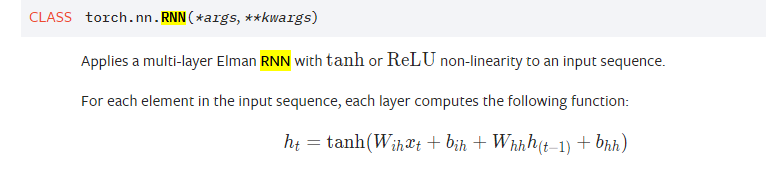

**示例1：输入序列长度为2，隐含层为1**

In [145]:
from torch import nn
import torch
import numpy as np

#[input_size, hidden_size, num_layers]
rnn = nn.RNN(10, 10, 1)

#[size,batch,dim]
inputR = torch.randn(2, 1, 10)

#[size,batch,dim]
h0 = torch.randn(1, 1, 10)

output, hn = rnn(inputR, h0)

print("output",output)
print("hn",hn)
for para  in list(rnn.named_parameters()):
   print(para[0],para[1].shape)

output tensor([[[ 0.0365,  0.1667, -0.7589, -0.7784, -0.8159, -0.1000,  0.2876,
          -0.2938, -0.0675, -0.3905]],

        [[ 0.6679,  0.8936,  0.1619,  0.3658,  0.4864,  0.0280, -0.4142,
           0.5107,  0.2790,  0.6179]]], grad_fn=<StackBackward>)
hn tensor([[[ 0.6679,  0.8936,  0.1619,  0.3658,  0.4864,  0.0280, -0.4142,
           0.5107,  0.2790,  0.6179]]], grad_fn=<StackBackward>)
weight_ih_l0 torch.Size([10, 10])
weight_hh_l0 torch.Size([10, 10])
bias_ih_l0 torch.Size([10])
bias_hh_l0 torch.Size([10])


output1

In [146]:
ih =  rnn.weight_ih_l0.data.mm(inputR[0].squeeze().view(10,1)) + rnn.bias_ih_l0.data.view(10,1)

hh = rnn.weight_hh_l0.data.mm(h0[0].squeeze().view(10, 1)) + rnn.bias_hh_l0.data.view(10,1)

temp = torch.tanh(ih+hh)
temp

tensor([[ 0.0365],
        [ 0.1667],
        [-0.7589],
        [-0.7784],
        [-0.8159],
        [-0.1000],
        [ 0.2876],
        [-0.2938],
        [-0.0675],
        [-0.3905]])

output2

In [147]:
ih =  rnn.weight_ih_l0.data.mm(inputR[1].squeeze().view(10,1)) + rnn.bias_ih_l0.data.view(10,1)

hh = rnn.weight_hh_l0.data.mm(temp) + rnn.bias_hh_l0.data.view(10,1)

temp = torch.tanh(ih+hh)
temp

tensor([[ 0.6679],
        [ 0.8936],
        [ 0.1619],
        [ 0.3658],
        [ 0.4864],
        [ 0.0280],
        [-0.4142],
        [ 0.5107],
        [ 0.2790],
        [ 0.6179]])

**示例2：以下为两层RNN示例**

输入序列长度为1，隐含层层数为2

In [148]:
#[input_size, hidden_size, num_layers]
rnn = nn.RNN(10, 10, 2)

#[size,batch,dim]
inputR = torch.randn(1, 1, 10)

#[size,batch,dim]
h0 = torch.randn(2, 1, 10)

output, hn = rnn(inputR, h0)

print("output",output)
print("hn",hn)

output tensor([[[-0.0395, -0.5792, -0.3492,  0.3639,  0.7415, -0.3165, -0.7299,
           0.9545, -0.3164, -0.6656]]], grad_fn=<StackBackward>)
hn tensor([[[-0.8576,  0.0320,  0.8981,  0.8532, -0.8725, -0.8605,  0.9906,
          -0.9157, -0.7639, -0.8300]],

        [[-0.0395, -0.5792, -0.3492,  0.3639,  0.7415, -0.3165, -0.7299,
           0.9545, -0.3164, -0.6656]]], grad_fn=<StackBackward>)


第一层输出

In [149]:
ih =  rnn.weight_ih_l0.data.mm(inputR[0].squeeze().view(10,1)) + rnn.bias_ih_l0.data.view(10,1)

hh = rnn.weight_hh_l0.data.mm(h0[0].squeeze().view(10, 1)) + rnn.bias_hh_l0.data.view(10,1)

temp = torch.tanh(ih+hh)
temp

tensor([[-0.8576],
        [ 0.0320],
        [ 0.8981],
        [ 0.8532],
        [-0.8725],
        [-0.8605],
        [ 0.9906],
        [-0.9157],
        [-0.7639],
        [-0.8300]])

第二层输出

In [150]:
ih1 =  rnn.weight_ih_l1.data.mm(temp.data) + rnn.bias_ih_l1.data.view(10,1)

hh1 = rnn.weight_hh_l1.data.mm(h0[1].squeeze().view(10, 1)) + rnn.bias_hh_l1.data.view(10,1)

torch.tanh(ih1+hh1)

tensor([[-0.0395],
        [-0.5792],
        [-0.3492],
        [ 0.3639],
        [ 0.7415],
        [-0.3165],
        [-0.7299],
        [ 0.9545],
        [-0.3164],
        [-0.6656]])

**示例3：以下两层RNN、两输入序列示例**

In [151]:
#[input_size, hidden_size, num_layers]
rnn = nn.RNN(10, 10, 2)

#[seq_size],batch,dim]
inputR = torch.randn(2, 1, 10)

#[size,batch,dim]
h0 = torch.randn(2, 1, 10)

output, hn = rnn(inputR, h0)

print("output: ",output)
print("hn: ",hn)

#打印参数
for para  in list(rnn.named_parameters()):
   print(para[0],para[1].shape)

output:  tensor([[[-0.6838,  0.2464, -0.7856,  0.4537,  0.6427, -0.0860, -0.6057,
          -0.4309, -0.0186,  0.4150]],

        [[ 0.1511,  0.5262, -0.3758, -0.1213, -0.3944,  0.5646, -0.5836,
           0.2102,  0.2781,  0.1190]]], grad_fn=<StackBackward>)
hn:  tensor([[[ 0.9116, -0.5951,  0.3207,  0.2453, -0.1374, -0.5649, -0.9165,
           0.2232,  0.3134, -0.7457]],

        [[ 0.1511,  0.5262, -0.3758, -0.1213, -0.3944,  0.5646, -0.5836,
           0.2102,  0.2781,  0.1190]]], grad_fn=<StackBackward>)
weight_ih_l0 torch.Size([10, 10])
weight_hh_l0 torch.Size([10, 10])
bias_ih_l0 torch.Size([10])
bias_hh_l0 torch.Size([10])
weight_ih_l1 torch.Size([10, 10])
weight_hh_l1 torch.Size([10, 10])
bias_ih_l1 torch.Size([10])
bias_hh_l1 torch.Size([10])


input[0] 第一层输出

In [152]:
ih =  rnn.weight_ih_l0.data.mm(inputR[0].squeeze().view(10,1)) + rnn.bias_ih_l0.data.view(10,1)

hh = rnn.weight_hh_l0.data.mm(h0[0].squeeze().view(10, 1)) + rnn.bias_hh_l0.data.view(10,1)

#layer index 0,input index 0
out_l0_i0 = torch.tanh(ih+hh)
out_l0_i0

tensor([[-0.6747],
        [ 0.5186],
        [ 0.2617],
        [-0.8594],
        [ 0.4271],
        [ 0.2121],
        [-0.3433],
        [ 0.2791],
        [ 0.6455],
        [ 0.3215]])

input[0] 第二层输出

In [153]:
ih1 =  rnn.weight_ih_l1.data.mm(out_l0_i0.data) + rnn.bias_ih_l1.data.view(10,1)

hh1 = rnn.weight_hh_l1.data.mm(h0[1].squeeze().view(10, 1)) + rnn.bias_hh_l1.data.view(10,1)

#layer index 1,input index 0
out_l1_i0 = torch.tanh(ih1+hh1)
print("out_l1_i0",out_l1_i0)
print("output[0]",output[0])

out_l1_i0 tensor([[-0.6838],
        [ 0.2464],
        [-0.7856],
        [ 0.4537],
        [ 0.6427],
        [-0.0860],
        [-0.6057],
        [-0.4309],
        [-0.0186],
        [ 0.4150]])
output[0] tensor([[-0.6838,  0.2464, -0.7856,  0.4537,  0.6427, -0.0860, -0.6057, -0.4309,
         -0.0186,  0.4150]], grad_fn=<SelectBackward>)


input[1] 第一层输出






In [154]:
ih =  rnn.weight_ih_l0.data.mm(inputR[1].squeeze().view(10,1)) + rnn.bias_ih_l0.data.view(10,1)

hh = rnn.weight_hh_l0.data.mm(out_l0_i0) + rnn.bias_hh_l0.data.view(10,1)

#layer index 0,input index 1
out_l0_i1 = torch.tanh(ih+hh)
print("out_l0_i1",out_l0_i1)
print("hn[0]",hn[0])


out_l0_i1 tensor([[ 0.9116],
        [-0.5951],
        [ 0.3207],
        [ 0.2453],
        [-0.1374],
        [-0.5649],
        [-0.9165],
        [ 0.2232],
        [ 0.3134],
        [-0.7457]])
hn[0] tensor([[ 0.9116, -0.5951,  0.3207,  0.2453, -0.1374, -0.5649, -0.9165,  0.2232,
          0.3134, -0.7457]], grad_fn=<SelectBackward>)


input[1] 第二层输出

In [155]:
ih1 =  rnn.weight_ih_l1.data.mm(out_l0_i1.data) + rnn.bias_ih_l1.data.view(10,1)

hh1 = rnn.weight_hh_l1.data.mm(out_l1_i0) +  rnn.bias_hh_l1.data.view(10,1)

#layer index 1,input index 1
out_l1_i1 = torch.tanh(ih1+hh1)
print("out_l1_i1",out_l1_i1)
print("hn[1]",hn[1])
print("output[1]",output[1])

out_l1_i1 tensor([[ 0.1511],
        [ 0.5262],
        [-0.3758],
        [-0.1213],
        [-0.3944],
        [ 0.5646],
        [-0.5836],
        [ 0.2102],
        [ 0.2781],
        [ 0.1190]])
hn[1] tensor([[ 0.1511,  0.5262, -0.3758, -0.1213, -0.3944,  0.5646, -0.5836,  0.2102,
          0.2781,  0.1190]], grad_fn=<SelectBackward>)
output[1] tensor([[ 0.1511,  0.5262, -0.3758, -0.1213, -0.3944,  0.5646, -0.5836,  0.2102,
          0.2781,  0.1190]], grad_fn=<SelectBackward>)
